# CIFAR-10 ANN vs CNN

Alright, now that we've learned both regular neural networks and convolutional neural networks, we want to go ahead and train a few networks to see what kind of results we get.

# CIFAR Dataset

# 📦 What's the Difference Between CIFAR-10 and CIFAR-100?

Both **CIFAR-10** and **CIFAR-100** are image classification datasets made up of 32×32 color images, but they differ in terms of class granularity and complexity.

---

## 🔍 Key Differences

| Feature | **CIFAR-10** | **CIFAR-100** |
|--------|--------------|----------------|
| 📚 Number of Classes | 10 | 100 |
| 🖼️ Images per Class | 6,000 | 600 |
| 🧠 Total Training Images | 50,000 | 50,000 |
| 🧪 Test Images | 10,000 | 10,000 |
| 📏 Image Size | 32×32 pixels (RGB) | 32×32 pixels (RGB) |
| 🧱 Label Structure | Flat (single level) | Hierarchical (fine + coarse labels) |
| 🔠 Example Classes | airplane, dog, frog, truck... | tulip, maple_tree, baby, pickup_truck... |

---

## 💡 Which One to Use?

- ✅ **Use CIFAR-10** if you're:
  - Just getting started with image classification
  - Testing simple or baseline models

- ✅ **Use CIFAR-100** if you're:
  - Exploring more challenging, fine-grained tasks
  - Interested in hierarchical or multi-task classification

---

CIFAR-10 is great for beginners and prototyping.  
CIFAR-100 offers a more realistic challenge for testing model robustness.


# Importing Dataset, Packages, and and Overview on the Dataset  

Using the commands and datasets available in Keras, we first load the CIFAR-10 dataset.

We then also import the necessary libraries as well.

In [7]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import cv2

In [3]:
import matplotlib.pyplot as plt

## Loading Train and Test sets with their Labels

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

We print the overall shape of our dataset to see how many training and test images we have, and also to check what the shape of our labels looks like.

In [5]:
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [6]:
x_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
y_train[0]

array([6], dtype=uint8)

In [34]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Using Matplotlib, we display a few images from our dataset to get a general idea of what the dataset contains.

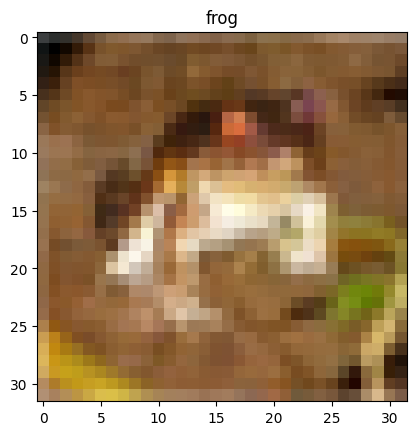

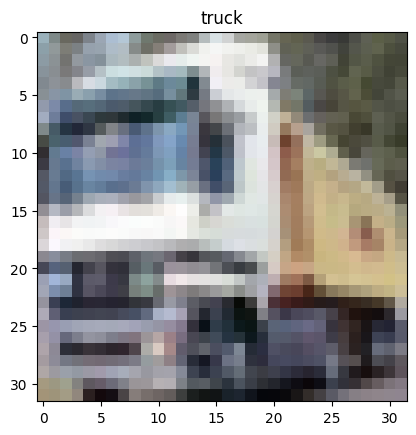

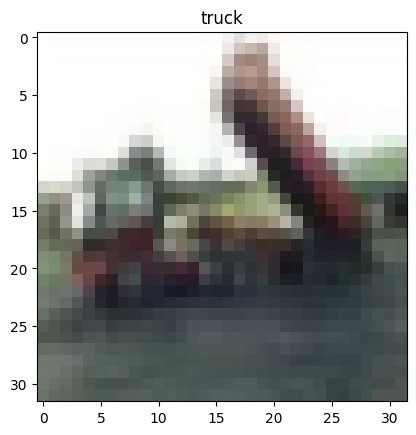

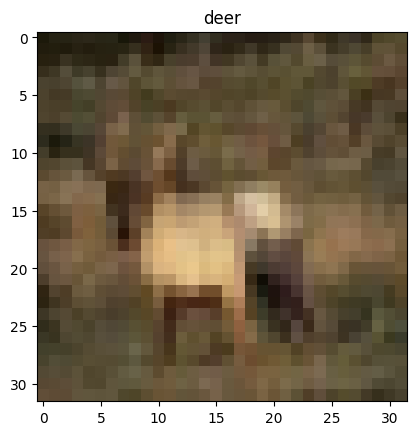

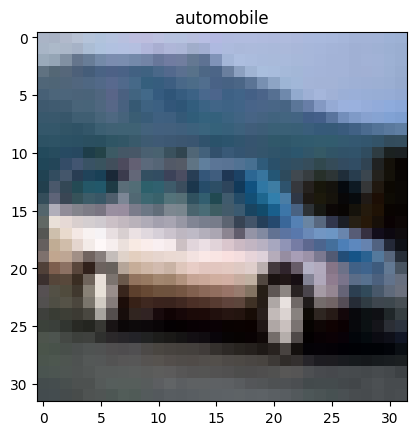

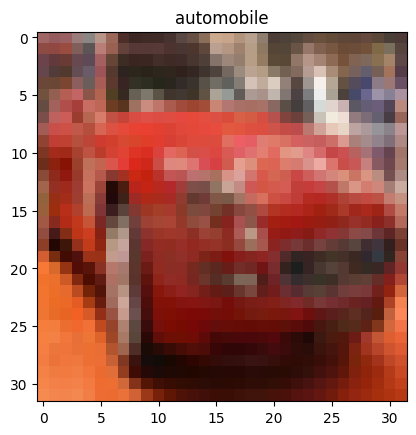

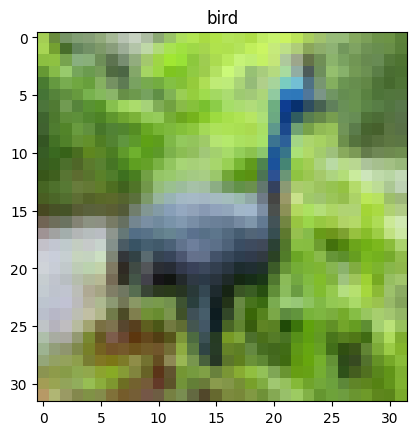

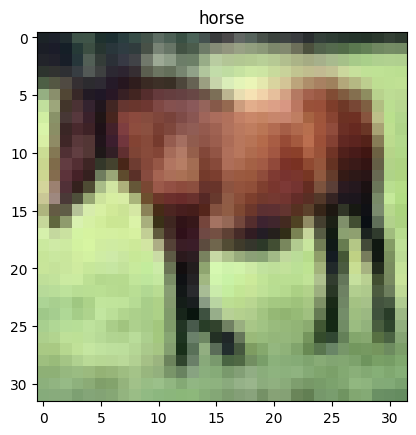

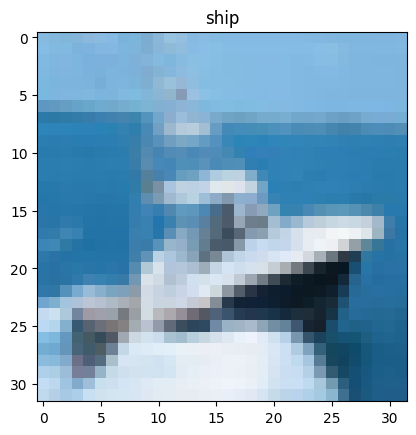

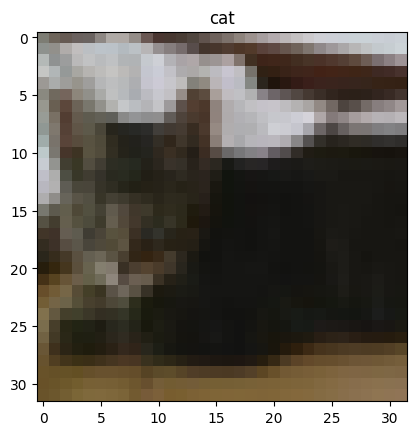

In [ ]:
for i in range(10):
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.show()

# ANN

At this stage, we want to fit an ANN on the CIFAR dataset images. But before that, we need to do a few things on the data first!

At this stage, we want to fit an ANN on the CIFAR dataset images. But before that, we need to do a few things on the data! And after that, they need to be in a format that can be fed into the ANN as input.

### ⚠️ Important Reminder: Don't Forget the 3 Color Channels!

When working with CIFAR-10 images:

- Each image has the shape **(32, 32, 3)** → height, width, and 3 **color channels** (RGB)
- If you're flattening the images to feed them into a fully connected ANN, make sure to include **all 3 channels**

In [7]:
x_train.shape[0]

50000

In [11]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)

In [12]:
x_train_flat.dtype  # dtype('uint8')

dtype('uint8')

In [7]:
x_train_final = x_train.reshape(x_train.shape[0], -1) / 255
x_test_final = x_test.reshape(x_test.shape[0], -1) / 255

In [8]:
x_train_final.dtype

dtype('float64')

In [9]:
x_train_final = x_train.reshape((x_train.shape[0], -1)).astype("float32") / 255.0
x_test_final = x_test.reshape((x_test.shape[0], -1)).astype("float32") / 255.0

In [10]:
x_train_final.dtype

dtype('float32')

### 🛠️ Image Preprocessing Explained: Reshaping, Normalization, and Data Type

Before feeding image data into a fully connected Artificial Neural Network (ANN), we need to prepare it properly. Here's why we apply the following steps:

---

#### 🔄 1. **Why do we reshape the images?**

Original image shape from CIFAR-10: (32, 32, 3) → height, width, RGB channels


- Neural networks using dense (fully connected) layers expect **1D input vectors**, not 3D images.
- So we reshape each image to a **flat vector**: 32 × 32 × 3 = 3072

✅ Final reshaped training set shape: (50000, 3072)

---

#### 🎨 2. **Why do we divide by 255? (Normalization)**

Pixel values in image data range from **0 to 255** (uint8).

- Dividing by 255 scales them to the range **[0.0, 1.0]**
- This makes training **faster, more stable, and more accurate**
- Neural networks generally perform better when inputs are **small, centered, and normalized**

---

#### 🔢 3. **Why use `.astype("float32")`?**

By default, dividing an integer array by an integer (like `/ 255`) in NumPy **converts the result to float64**. While this works, it's not ideal for deep learning:

| Reason | Why it matters |
|--------|----------------|
| ✅ ML Frameworks Expect It | Libraries like TensorFlow and PyTorch use `float32` by default |
| ⚡ More Efficient on GPU | `float32` uses less memory and computes faster than `float64` |
| 📏 Lower Memory Usage | Saves half the memory compared to `float64` |
| 🧠 Consistency | Ensures compatibility and avoids subtle bugs later |

---

### ✅ Final Code

```python
x_train_final = x_train.reshape((x_train.shape[0], -1)).astype("float32") / 255.0
x_test_final = x_test.reshape((x_test.shape[0], -1)).astype("float32") / 255.0

##### To make sure our data is in the format we want, we print their shapes.

In [11]:
print("Training images shape:", x_train_final.shape)
print("Training labels shape:", x_test_final.shape)

Training images shape: (50000, 3072)
Training labels shape: (10000, 3072)


Now, the label format needs to match the format of our network's output — meaning it should have 10 values.
So, using the to_categorical function from Keras, we create the desired labels.

In [12]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

<div dir="auto">
Now we need to build our model.
First of all, we import the classes, functions, and layers that we need.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

Now, we build our model:
1. We build our model using the Sequential API.
2. The first layer is an Input layer, and we specify the input shape for it.
3. Then, we add Dense layers in order, with 512, 512, 1024, and 10 nodes respectively, and assign appropriate activation functions to each one.

In [19]:
model = Sequential()
model.add(Input(shape=(32*32*3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

We compile our model,
set the loss function to categorical_crossentropy, and use the Adam optimizer.
We also use the accuracy metric to make the model’s performance more interpretable.

In [20]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Let's look at the summary of our model.
How many parameters do we have?

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,371,594
Trainable params: 2,371,594
Non-trainable params: 0
_________________________________________________________________


We fit our model on the data we’ve prepared, using the following arguments:
batch_size = 128
epochs = 30

And don’t forget the validation data! We want our model to perform well on the test dataset, so we include that in the training process too.

In [22]:
model.fit(
    x_train_final,
    y_train_cat,
    batch_size = 128,
    epochs = 30,
    verbose = 1,
    validation_data = (x_test_final, y_test_cat)
)

Epoch 1/30
391/391 [==============================] - 3s 4ms/step - loss: 1.8523 - accuracy: 0.3266 - val_loss: 1.7277 - val_accuracy: 0.3836
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 1.6378 - accuracy: 0.4129 - val_loss: 1.5905 - val_accuracy: 0.4346
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 1.5590 - accuracy: 0.4398 - val_loss: 1.4953 - val_accuracy: 0.4705
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 1.4904 - accuracy: 0.4635 - val_loss: 1.4937 - val_accuracy: 0.4710
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 1.4464 - accuracy: 0.4824 - val_loss: 1.5017 - val_accuracy: 0.4655
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 1.4209 - accuracy: 0.4923 - val_loss: 1.4709 - val_accuracy: 0.4841
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 1.3718 - accuracy: 0.5064 - val_loss: 1.4511 - val_accuracy: 0.4840
Epoch 

### ❌ Why ANN Fails on Image Data Like CIFAR-10

When using a basic **Artificial Neural Network (ANN)** (a.k.a. fully connected network) on image datasets like CIFAR-10, we often see poor generalization performance on validation/test data.

---

#### 🧪 What's the issue?

- ANN **flattens** images into 1D vectors (e.g., 32×32×3 → 3072).
- This causes the model to **lose spatial structure** (like edges, textures, object shapes).
- As a result, the network can't **detect local features** that are crucial for image understanding.

---

#### ⚠️ Symptoms You Might See

- **High training accuracy** (the model memorizes the data)
- **Low validation accuracy**
- **Validation loss increasing** while training loss decreases → classic sign of **overfitting**

---

#### ✅ Why CNNs Work Better

- CNNs preserve the **2D spatial structure** of images
- They use **convolutional layers** to learn local patterns (edges, corners, etc.)
- CNNs are much more effective at learning image hierarchies and generalizing to new images

---

📌 **Conclusion**: ANNs are not well-suited for image tasks. For datasets like CIFAR-10, **Convolutional Neural Networks (CNNs)** are the preferred choice.


<br><br><br>  <!-- Creates multiple empty lines -->

# CNN

Now let’s build a CNN!🔥

Just like before, the first thing we need to do is properly transform our data.
So, our data should be reshaped and scaled between 0 and 1.
Also, let’s not forget to use astype so that we get float32 instead of float64.

In [3]:
x_train_cnn = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test_cnn = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

In [9]:
x_train_cnn = x_train.astype("float32") / 255
x_test_cnn = x_test.astype("float32") / 255

Now, the label format needs to match the format of our network's output — meaning it should have 10 values.
So, using the to_categorical function from Keras, we create the desired labels.

In [10]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

<div dir="auto">
Now we need to build our model.
First of all, we import the classes, functions, and layers that we need.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

Now we build our model:

1. We define the model using the Sequential API.

2. We add the input layer to the network and specify the shape it accepts.

3. We add three convolutional layers in sequence, each with 32 filters.

4. We add a max pooling layer to the network.

5. We add a flatten layer to convert the feature maps into a 1D vector.

6. We add three dense layers with 64, 32, and 10 nodes respectively, and assign appropriate activation functions to each.

In [16]:
model = Sequential() #Model

#CNN
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

#ANN
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy']
)

Let's look at the summary of our model.
How many parameters do we have?

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                346176    
                                                      

We fit our model on the data we’ve prepared, using the following arguments:
batch_size = 128
epochs = 30

And don’t forget the validation data! We want our model to perform well on the test dataset, so we include that in the training process too.

In [19]:
model.fit(
    x_train_cnn,
    y_train_cat,
    batch_size = 128,
    epochs = 30,
    verbose = 1,
    validation_data = (x_test_cnn, y_test_cat)
)

Epoch 1/30
391/391 [==============================] - 10s 12ms/step - loss: 1.6121 - accuracy: 0.4116 - val_loss: 1.3504 - val_accuracy: 0.5084
Epoch 2/30
391/391 [==============================] - 4s 11ms/step - loss: 1.2227 - accuracy: 0.5662 - val_loss: 1.1446 - val_accuracy: 0.5928
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0423 - accuracy: 0.6349 - val_loss: 1.0860 - val_accuracy: 0.6195
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9339 - accuracy: 0.6741 - val_loss: 0.9991 - val_accuracy: 0.6519
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 0.8561 - accuracy: 0.7021 - val_loss: 0.9955 - val_accuracy: 0.6536
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.7896 - accuracy: 0.7245 - val_loss: 0.9728 - val_accuracy: 0.6641
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.7248 - accuracy: 0.7491 - val_loss: 0.9666 - val_accuracy: 0.672

---

We’re going to modify both our ANN and CNN models
to see what the highest accuracy we can get from them is.

In [3]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential() #Model

#CNN
#First Block
model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu',
                 input_shape=(32,32,3)
                 )
)
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#Second Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#Third Block
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#Last of CNN
model.add(Flatten())
model.add(Dropout(0.25))
#---------------------------------------------------------------------
#ANN
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy']
)

In [10]:
model.fit(
    x_train_cnn,         # CNN-shaped input: (50000, 32, 32, 3)
    y_train_cat,         # One-hot encoded labels: (50000, 10)
    batch_size=64,      # Reasonable for training speed vs. memory
    epochs=30,           # Good range to watch learning progress
    verbose=1,           # Shows progress bar
    validation_data=(x_test_cnn, y_test_cat)  # Evaluates generalization
)

Epoch 1/30
782/782 [==============================] - 7s 9ms/step - loss: 0.5262 - accuracy: 0.8254 - val_loss: 0.9123 - val_accuracy: 0.7257
Epoch 2/30
782/782 [==============================] - 7s 9ms/step - loss: 0.5217 - accuracy: 0.8262 - val_loss: 0.9471 - val_accuracy: 0.7171
Epoch 3/30
782/782 [==============================] - 7s 9ms/step - loss: 0.5106 - accuracy: 0.8309 - val_loss: 0.9231 - val_accuracy: 0.7215
Epoch 4/30
782/782 [==============================] - 7s 9ms/step - loss: 0.5062 - accuracy: 0.8311 - val_loss: 0.9213 - val_accuracy: 0.7215
Epoch 5/30
782/782 [==============================] - 7s 9ms/step - loss: 0.4948 - accuracy: 0.8369 - val_loss: 0.9171 - val_accuracy: 0.7257
Epoch 6/30
782/782 [==============================] - 8s 10ms/step - loss: 0.4860 - accuracy: 0.8383 - val_loss: 0.9372 - val_accuracy: 0.7116
Epoch 7/30
782/782 [==============================] - 7s 10ms/step - loss: 0.4825 - accuracy: 0.8412 - val_loss: 0.9310 - val_accuracy: 0.7202
Epoc

### 🧠 Deep CNN Model Explanation & Training Summary

This section defines and trains a deep **Convolutional Neural Network (CNN)** designed for **image classification** on the CIFAR-10 dataset. The model is built using the **Keras Sequential API**, and contains both convolutional and dense (fully connected) layers.

---

#### 📐 Model Architecture

##### 🧱 Convolutional Feature Extractor (CNN Blocks)

1. **First Block**
   - `Conv2D(32)` × 3 with ReLU activation
   - `MaxPool2D(2×2)`
   - Learns low-level features (edges, textures)

2. **Second Block**
   - `Conv2D(64)` × 2 with ReLU
   - `MaxPool2D(2×2)`
   - Learns mid-level features (shapes, object parts)

3. **Third Block**
   - `Conv2D(128)` × 1 with ReLU
   - `MaxPool2D(2×2)`
   - Learns high-level abstract features

4. `Flatten()` – Converts 3D feature maps into a 1D vector  
5. `Dropout(0.25)` – Regularization to reduce overfitting

---

##### 🧠 Fully Connected Classifier (ANN Part)

1. `Dense(256)` with ReLU + `Dropout(0.5)`
2. `Dense(128)` with ReLU + `Dropout(0.5)`
3. `Dense(64)` with ReLU
4. `Dense(10)` with `softmax` – Output layer for 10 classes

---

#### ⚙️ Compilation Details

- **Loss Function**: `categorical_crossentropy` (for multi-class classification)
- **Optimizer**: `adam` (efficient and adaptive)
- **Metric**: `accuracy`

```python
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


<br><br><br>  <!-- Creates multiple empty lines -->

### 📊 CNN Model Performance Comparison

This section compares the performance of a **simple CNN** and an **enhanced deep CNN** on the CIFAR-10 dataset.

---

#### 🧠 Simple CNN Model

- **Structure**:
  - 3 × `Conv2D(32, 3x3)` + ReLU
  - `MaxPool2D(2x2)`
  - `Flatten()`
  - Dense Layers: 64 → 32 → 10 with ReLU and Softmax
- **Training Result**:
  - Final training accuracy: **~96%**
  - Final validation accuracy: **~63%**

🟡 **Observation**: While the model performed well on training data, it **overfitted** quickly and failed to generalize well to unseen data.

---

#### 🚀 Enhanced Deep CNN Model

- **Structure**:
  - Block 1: 3 × `Conv2D(32, 3x3)` → `MaxPool2D(2x2)`
  - Block 2: 2 × `Conv2D(64, 3x3)` → `MaxPool2D(2x2)`
  - Block 3: 1 × `Conv2D(128, 3x3)` → `MaxPool2D(2x2)`
  - `Flatten()` → `Dropout(0.25)`
  - Dense Layers: 256 → `Dropout(0.5)` → 128 → `Dropout(0.5)` → 64 → 10
- **Training Result**:
  - Final training accuracy: **~88%**
  - Final validation accuracy: **~72%**

🟢 **Observation**: The deeper architecture with regularization techniques **reduced overfitting** and **improved generalization** on test data significantly.

---

✅ **Conclusion**:
- The deeper CNN with `Dropout` and more feature extraction layers was able to **generalize better**.
- For image data like CIFAR-10, CNNs dramatically outperform plain fully connected networks.


<br><br><br>  <!-- Creates multiple empty lines -->

In [11]:
model = Sequential() #Model

#CNN
#First Block
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3),
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 activation='relu', kernel_initializer = 'he_uniform',
                 padding = 'same'
                )
)
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 activation='relu', kernel_initializer = 'he_uniform',
                 padding = 'same'
                )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Second Block
model.add(Conv2D(64, (3, 3), activation='relu',
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(Conv2D(64, (3, 3), activation='relu',
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third Block
model.add(Conv2D(128, (3, 3), activation='relu',
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(Conv2D(128, (3, 3), activation='relu',
                 kernel_initializer = 'he_uniform', padding = 'same'
                )
)
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Last of CNN
model.add(Flatten())
model.add(Dropout(0.25))
#---------------------------------------------------------------------
#ANN
model.add(Dense(256, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy']
)

In [12]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy']
)

In [13]:
model.fit(
    x_train_cnn,         # CNN-shaped input: (50000, 32, 32, 3)
    y_train_cat,         # One-hot encoded labels: (50000, 10)
    batch_size=64,      # Reasonable for training speed vs. memory
    epochs=30,           # Good range to watch learning progress
    verbose=1,           # Shows progress bar
    validation_data=(x_test_cnn, y_test_cat)  # Evaluates generalization
)

Epoch 1/30
782/782 [==============================] - 16s 13ms/step - loss: 2.0060 - accuracy: 0.2164 - val_loss: 1.7482 - val_accuracy: 0.3493
Epoch 2/30
782/782 [==============================] - 10s 12ms/step - loss: 1.5624 - accuracy: 0.4128 - val_loss: 1.2688 - val_accuracy: 0.5386
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 1.3040 - accuracy: 0.5277 - val_loss: 1.2338 - val_accuracy: 0.5584
Epoch 4/30
782/782 [==============================] - 10s 13ms/step - loss: 1.1525 - accuracy: 0.5930 - val_loss: 1.0227 - val_accuracy: 0.6340
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 1.0520 - accuracy: 0.6341 - val_loss: 0.9109 - val_accuracy: 0.6795
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.9770 - accuracy: 0.6624 - val_loss: 0.8574 - val_accuracy: 0.6948
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.9232 - accuracy: 0.6815 - val_loss: 0.8166 - val_accuracy: